In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [209]:
import warnings

warnings.filterwarnings('ignore')

In [210]:
data = 'Social_Network_Ads.csv'
df = pd.read_csv(data)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [211]:
df.shape

(400, 5)

In [212]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [213]:
df.columns = ['UserID', 'Gender','Age','EstimatedSalary','Purchased']

In [214]:
print(df.head())

     UserID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserID           400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [216]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['Gender']


In [217]:
df[categorical].head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


In [218]:
df[categorical].isnull().sum()

Gender    0
dtype: int64

In [219]:
for var in categorical: 
    
    print(df[var].value_counts())

Gender
Female    204
Male      196
Name: count, dtype: int64


In [220]:
for var in categorical: 
    
    print(df[var].value_counts()/float(len(df)))

Gender
Female    0.51
Male      0.49
Name: count, dtype: float64


In [221]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Gender  contains  2  labels


In [222]:
df['Gender'].dtypes

dtype('O')

In [223]:
if 'gender' in df.columns:
    df = df.drop('gender', axis=1)
else:
    print("Column 'gender' not found in the DataFrame")

Column 'gender' not found in the DataFrame


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserID           400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [225]:
df.drop('Gender', axis=1, inplace = True)

In [226]:
df.head()

,UserID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [227]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 4 numerical variables

The numerical variables are : ['UserID', 'Age', 'EstimatedSalary', 'Purchased']


In [228]:
df[numerical].head()

,UserID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [229]:
df[numerical].isnull().sum()

UserID             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

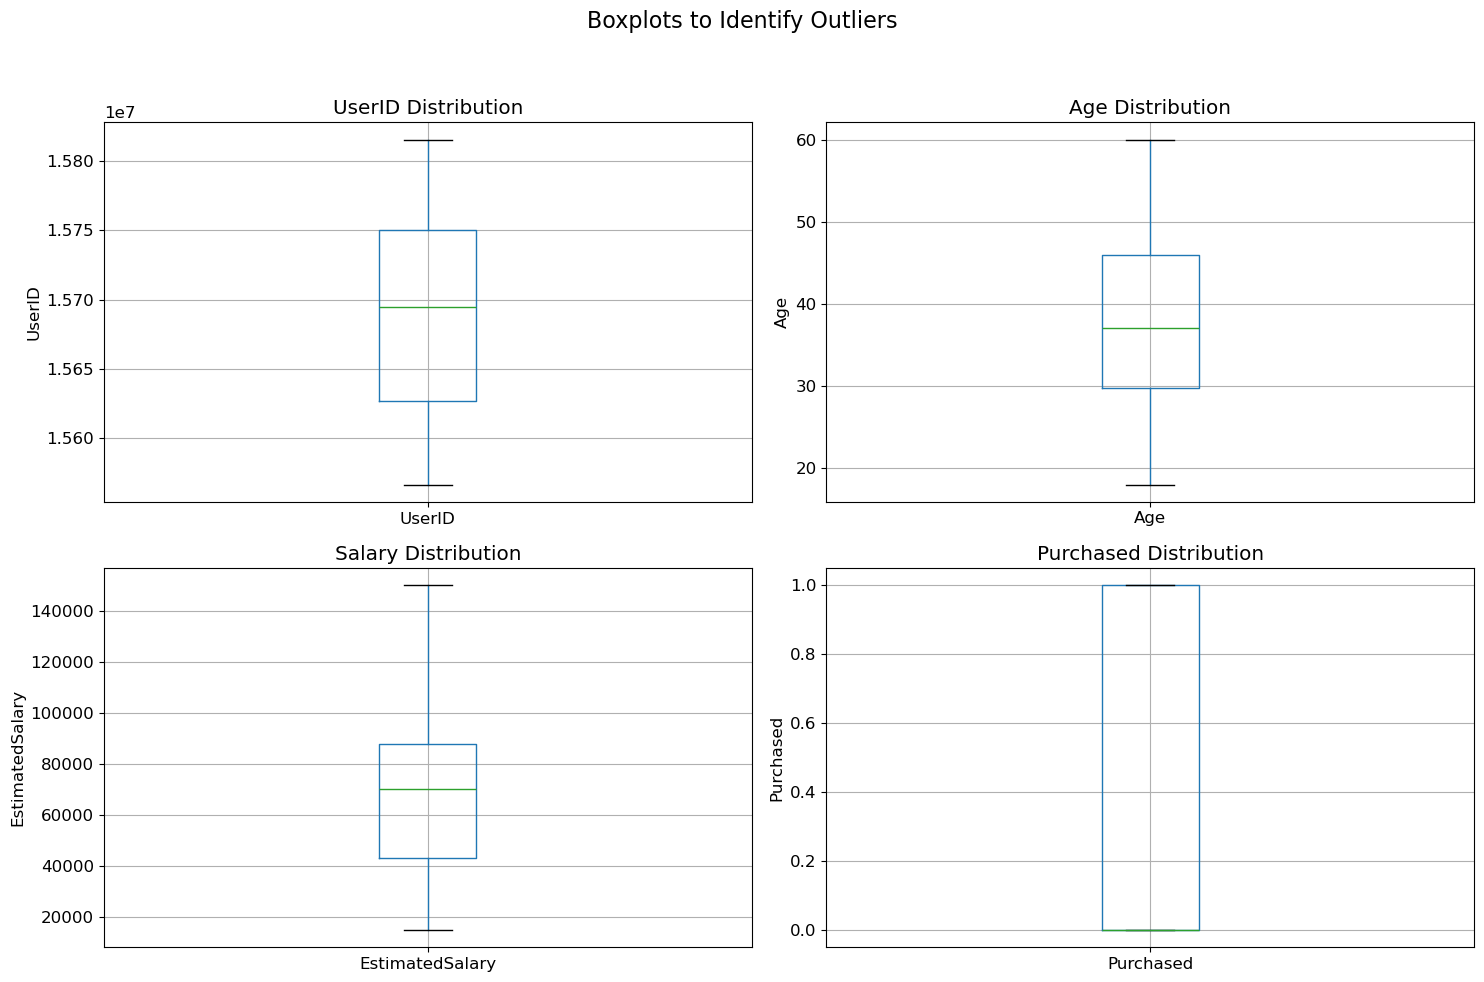

             UserID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [230]:
# Create a figure for the boxplots
plt.figure(figsize=(15, 10))

# Create boxplots for each relevant column
plt.subplot(2, 2, 1)
fig = df.boxplot(column='UserID')
fig.set_title('UserID Distribution')
fig.set_ylabel('UserID')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Age')
fig.set_title('Age Distribution')
fig.set_ylabel('Age')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='EstimatedSalary')
fig.set_title('Salary Distribution')
fig.set_ylabel('EstimatedSalary')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='Purchased')
fig.set_title('Purchased Distribution')
fig.set_ylabel('Purchased')

# Add a main title
plt.suptitle('Boxplots to Identify Outliers', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

# Optional: Print statistical summary
print(df[['UserID', 'Age', 'EstimatedSalary', 'Purchased']].describe())

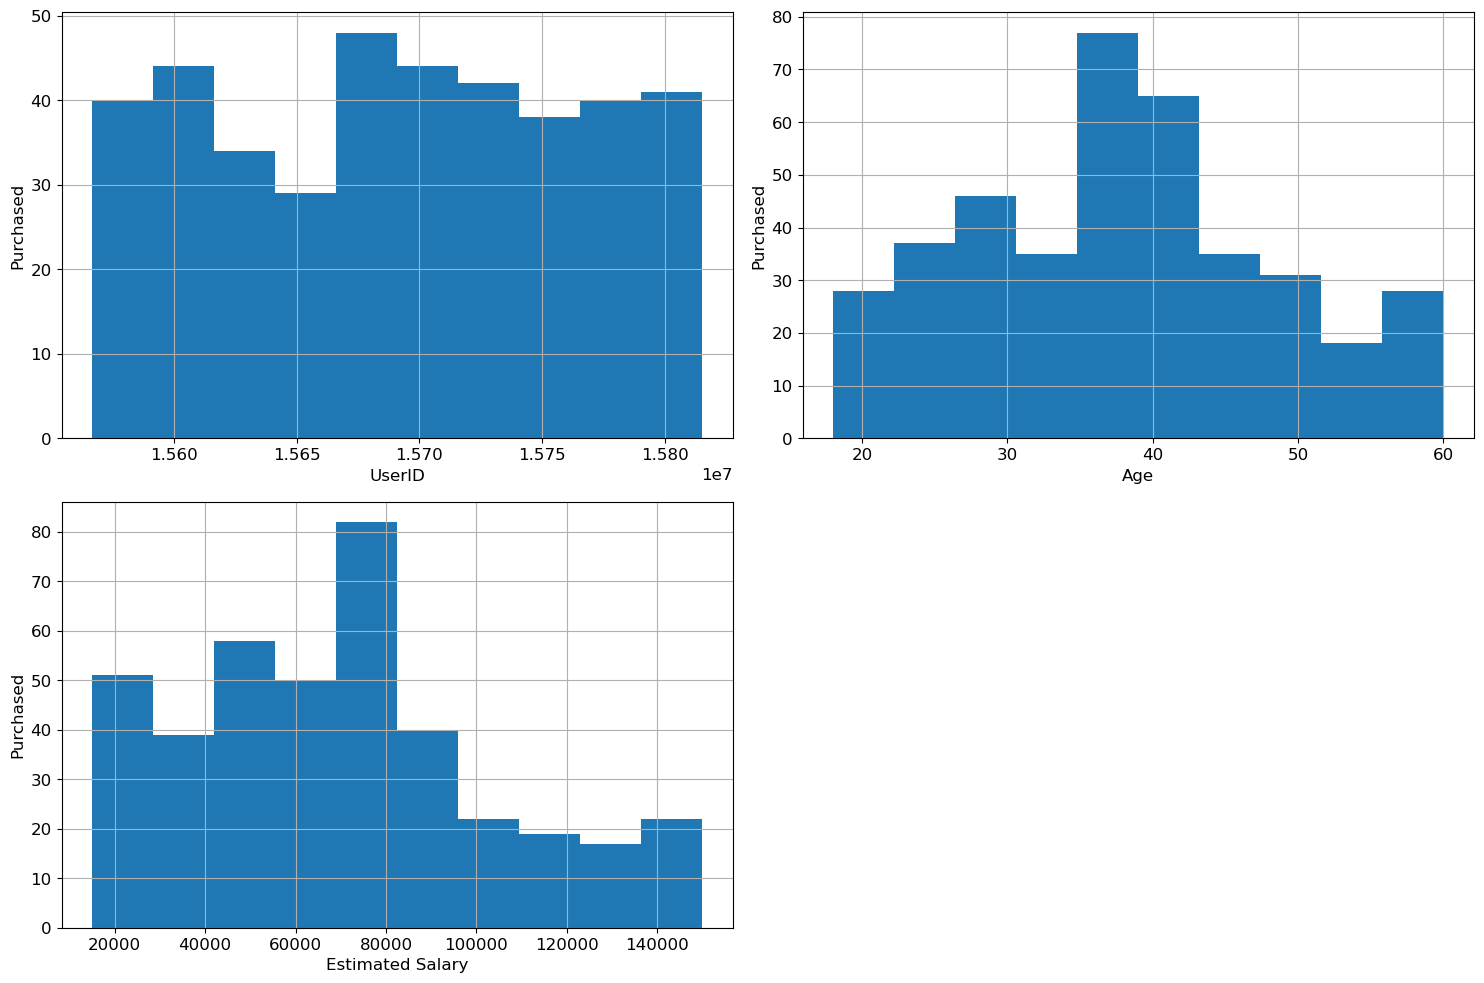

In [231]:
plt.figure(figsize=(15, 10))

# UserID distribution
plt.subplot(2, 2, 1)
df.UserID.hist(bins=10)
plt.xlabel('UserID')
plt.ylabel('Purchased') 

# Age distribution
plt.subplot(2, 2, 2)
df.Age.hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Purchased') 

# Estimated Salary distribution
plt.subplot(2, 2, 3)
df.EstimatedSalary.hist(bins=10)
plt.xlabel('Estimated Salary')
plt.ylabel('Purchased')

plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

In [232]:
#no outliers are there

In [233]:
X = df.drop(['Purchased'], axis=1)

y = df['Purchased']

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [235]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((320, 3), (80, 3))

In [236]:
X_train.dtypes

UserID             int64
Age                int64
EstimatedSalary    int64
dtype: object

In [237]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [238]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['UserID', 'Age', 'EstimatedSalary']

In [239]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

UserID             0
Age                0
EstimatedSalary    0
dtype: int64

In [240]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

UserID             0
Age                0
EstimatedSalary    0
dtype: int64

In [241]:
X_train.describe()

,UserID,Age,EstimatedSalary
count,3.200000e+02,320.00000,320.000000
mean,1.569120e+07,38.21875,69928.125000
std,7.058254e+04,10.30304,34570.057299
min,1.556964e+07,18.00000,15000.000000
25%,1.562820e+07,30.00000,43000.000000
50%,1.569434e+07,38.00000,69500.000000
75%,1.574919e+07,46.00000,88000.000000
max,1.581524e+07,60.00000,150000.000000


In [242]:
cols = X_train.columns

In [243]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [244]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [245]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [246]:
X_train.describe()

,UserID,Age,EstimatedSalary
count,320.000000,320.000000,320.000000
mean,0.494963,0.481399,0.406875
std,0.287394,0.245310,0.256074
min,0.000000,0.000000,0.000000
25%,0.238426,0.285714,0.207407
50%,0.507749,0.476190,0.403704
75%,0.731089,0.666667,0.540741
max,1.000000,1.000000,1.000000


In [247]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [248]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [249]:
# probability of getting output as 0 - no purchase

logreg.predict_proba(X_test)[:,0]

array([0.77073179, 0.70325466, 0.73087323, 0.79732291, 0.75799581,
       0.94264127, 0.88848262, 0.39371599, 0.93328814, 0.49985267,
       0.85446746, 0.89004425, 0.75370554, 0.54275693, 0.90821693,
       0.65373741, 0.67472502, 0.92630883, 0.1001446 , 0.85088551,
       0.75695456, 0.19321316, 0.64327359, 0.30656492, 0.93627092,
       0.17230681, 0.78637922, 0.79834164, 0.67374568, 0.67901466,
       0.86371058, 0.61226035, 0.28285219, 0.70195565, 0.90813002,
       0.95521181, 0.88599955, 0.77728592, 0.86812261, 0.46383247,
       0.82949689, 0.63774435, 0.78921591, 0.87813379, 0.36108007,
       0.86540393, 0.67808637, 0.26104911, 0.93315151, 0.28245408,
       0.11594639, 0.83586805, 0.70826281, 0.50965096, 0.11948186,
       0.65006269, 0.80509408, 0.807754  , 0.59263294, 0.9462412 ,
       0.86872873, 0.27192258, 0.93538484, 0.5864695 , 0.96167149,
       0.15509588, 0.86220746, 0.88131391, 0.64931877, 0.56232281,
       0.4765436 , 0.73748216, 0.89457084, 0.64654743, 0.83361

In [250]:
# probability of getting output as 1 - purchase

logreg.predict_proba(X_test)[:,1]

array([0.22926821, 0.29674534, 0.26912677, 0.20267709, 0.24200419,
       0.05735873, 0.11151738, 0.60628401, 0.06671186, 0.50014733,
       0.14553254, 0.10995575, 0.24629446, 0.45724307, 0.09178307,
       0.34626259, 0.32527498, 0.07369117, 0.8998554 , 0.14911449,
       0.24304544, 0.80678684, 0.35672641, 0.69343508, 0.06372908,
       0.82769319, 0.21362078, 0.20165836, 0.32625432, 0.32098534,
       0.13628942, 0.38773965, 0.71714781, 0.29804435, 0.09186998,
       0.04478819, 0.11400045, 0.22271408, 0.13187739, 0.53616753,
       0.17050311, 0.36225565, 0.21078409, 0.12186621, 0.63891993,
       0.13459607, 0.32191363, 0.73895089, 0.06684849, 0.71754592,
       0.88405361, 0.16413195, 0.29173719, 0.49034904, 0.88051814,
       0.34993731, 0.19490592, 0.192246  , 0.40736706, 0.0537588 ,
       0.13127127, 0.72807742, 0.06461516, 0.4135305 , 0.03832851,
       0.84490412, 0.13779254, 0.11868609, 0.35068123, 0.43767719,
       0.5234564 , 0.26251784, 0.10542916, 0.35345257, 0.16638

In [251]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9250


In [252]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [253]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8031


In [254]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8031
Test set score: 0.9250


In [255]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [256]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8281
Test set score: 0.9125


In [257]:
# check class distribution in test set

y_test.value_counts()

Purchased
0    58
1    22
Name: count, dtype: int64

In [258]:
# check null accuracy score

null_accuracy = (58/(58+22))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7250


In [259]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[57  1]
 [ 5 17]]

True Positives(TP) =  57

True Negatives(TN) =  17

False Positives(FP) =  1

False Negatives(FN) =  5


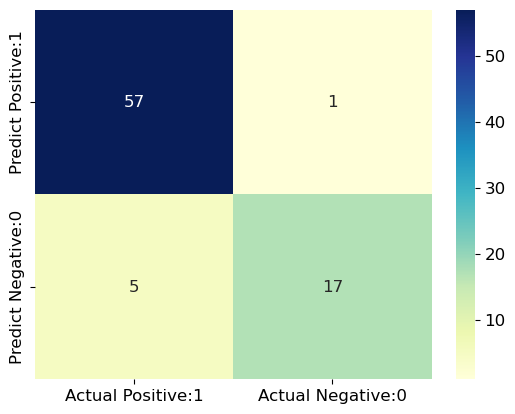

In [260]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [261]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



In [262]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [263]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9250


In [264]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0750


In [265]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9828


In [266]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9194


In [267]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9194


In [268]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0556


In [269]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9444


In [270]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.77073179, 0.22926821],
       [0.70325466, 0.29674534],
       [0.73087323, 0.26912677],
       [0.79732291, 0.20267709],
       [0.75799581, 0.24200419],
       [0.94264127, 0.05735873],
       [0.88848262, 0.11151738],
       [0.39371599, 0.60628401],
       [0.93328814, 0.06671186],
       [0.49985267, 0.50014733]])

In [271]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No purchase (0)', 'Prob of - purchase (1)'])

y_pred_prob_df

,Prob of - No purchase (0),Prob of - purchase (1)
0,0.770732,0.229268
1,0.703255,0.296745
2,0.730873,0.269127
3,0.797323,0.202677
4,0.757996,0.242004
5,0.942641,0.057359
6,0.888483,0.111517
7,0.393716,0.606284
8,0.933288,0.066712
9,0.499853,0.500147


In [272]:
# print the first 10 predicted probabilities for class 1 - Probability of purchase

logreg.predict_proba(X_test)[0:10, 1]

array([0.22926821, 0.29674534, 0.26912677, 0.20267709, 0.24200419,
       0.05735873, 0.11151738, 0.60628401, 0.06671186, 0.50014733])

In [273]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

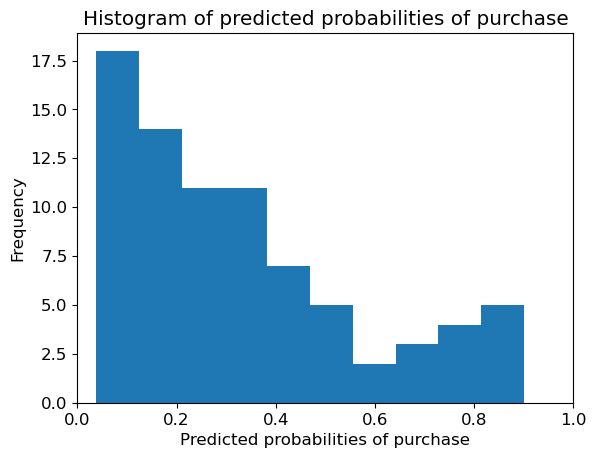

In [274]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of purchase')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of purchase')
plt.ylabel('Frequency')
plt.show()

In [275]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    # Use threshold as a named parameter
    y_pred2 = binarize(y_pred1, threshold=i/10)
    
    # Keep numeric format instead of converting to strings
    # This ensures consistent types between y_test and predictions
    y_pred2 = y_pred2.ravel()  # Flatten the array to 1D for confusion_matrix
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[12 46]
 [ 0 22]] 

 with 34 correct predictions,  

 46 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.425 

 Sensitivity:  1.0 

 Specificity:  0.20689655172413793 



With 0.2 threshold the Confusion Matrix is  

 [[30 28]
 [ 0 22]] 

 with 52 correct predictions,  

 28 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.65 

 Sensitivity:  1.0 

 Specificity:  0.5172413793103449 



With 0.3 threshold the Confusion Matrix is  

 [[44 14]
 [ 0 22]] 

 with 66 correct predictions,  

 14 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.825 

 Sensitivity:  1.0 

 Specificity:  0.7586206896551724 



With 0.4 threshold the Confusion Matrix is  

 [[52  6]
 [ 3 19]] 

 with 71 correct predictions,  

 6 Type I errors( False Positives),  

 3 Type II errors( False Negatives),  

 Accuracy score:  0.88

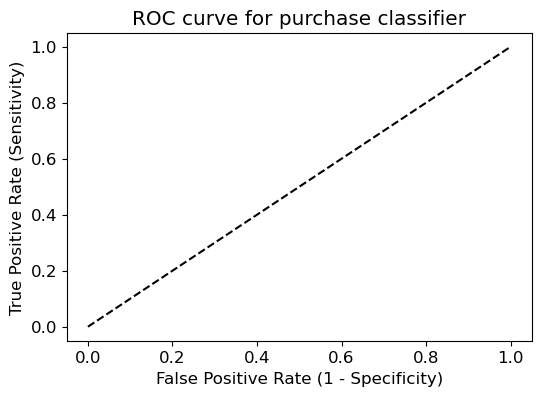

In [279]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for purchase classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [277]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9741


In [278]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9073


In [280]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

In [281]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 1


In [282]:
# transform the training data

X_train_rfecv = rfecv.transform(X_train)


# train classifier

logreg.fit(X_train_rfecv, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [283]:
# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = logreg.predict(X_test_rfecv)

In [284]:
# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv,y_test)))

Classifier score: 0.9250


In [285]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[57  1]
 [ 5 17]]

True Positives(TP1) =  57

True Negatives(TN1) =  17

False Positives(FP1) =  1

False Negatives(FN1) =  5


In [286]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.75     0.78125  0.765625 0.8125   0.90625 ]


In [287]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8031


In [288]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [289]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8313


Parameters that give the best results : 

 {'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10, random_state=0, solver='liblinear')


In [290]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9125
